# цели и задачи проекта

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН,
чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике,
чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике
для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели,
проведите разведывательный анализ данных и составьте отчёт по его результатам.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv(r'd:\sys\Users\akbear\skillfactory\Project02\stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
#переименуем колонки
stud.rename(columns={'Medu': 'medu', 'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob',
                     'studytime, granular': 'granular', 'Pstatus': 'pstatus'
                    }, inplace=True)
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')

# school — аббревиатура школы

In [3]:
pd.DataFrame(stud.school.value_counts())

#потенциально важный признак. от школы как комплекса из ряда компонентов от уюта до т.н. "силы" преподавательского состава сильно
#зависит как приток новых перспективных учеников, так и развитие  потенциала "старых".

,school
GP,349
MS,46


In [4]:
stud.school.isnull().sum() #пустых позиций нет

0

<AxesSubplot:xlabel='school', ylabel='count'>

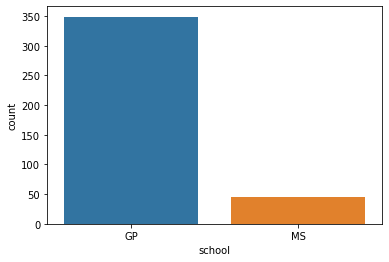

In [5]:
sns.countplot(x = 'school', data = stud)

# sex - распределение по полу

In [6]:
pd.DataFrame(stud.sex.value_counts()) 

#по статистике у мальчиков более развито абстрактное мышление,
#однако в случае если школа "математическая", то признак может нивелироваться.

,sex
F,208
M,187


In [7]:
stud.sex.isnull().sum() #пустых позиций нет

0

<AxesSubplot:xlabel='sex', ylabel='count'>

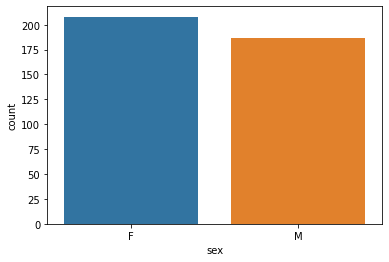

In [8]:
sns.countplot(x = 'sex', data = stud)

# age - распределение по возрасту

In [9]:
pd.DataFrame(stud.age.value_counts()) 

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


In [10]:
stud.age.isnull().sum() #пустых позиций нет

0

In [11]:
#stud = stud.loc[stud.age < 20] #отсеем "недетей" - это противоречит по проектному заданию, но при отбрасывании всего лишь 
#пятерых учеников 20+ результаты серьёзно меняются. также очень интересно меняются итоговые оценки значимости в случае
#если оставить только 18 и младше (при том, что отбрасывается менее 10% объема анкет) 

In [12]:
#изначальное предположение: исходная таблица - результат оцифровки бумажных анкет.
#в первую очередь это основано на том, что первые и самые важные позиции (школа, пол  и возраст),
#обычно находящиеся в шапках подобных документов, не имеют пропусков.

<AxesSubplot:xlabel='age', ylabel='Count'>

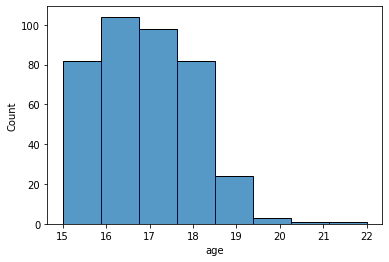

In [13]:
sns.histplot(data=stud.age, bins = 8)

# address - распределение по адресам
(U - город, R - пригород)

In [14]:
pd.DataFrame(stud.address.value_counts()) #распределение по адресам

,address
U,295
R,83


In [15]:
stud.address.isnull().sum() # 17 пустых позиций

17

<AxesSubplot:xlabel='address', ylabel='count'>

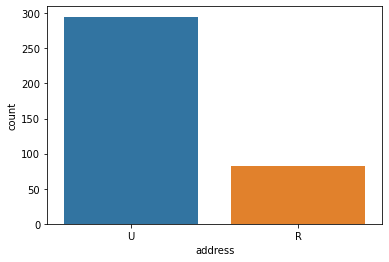

In [16]:
sns.countplot(x = 'address', data = stud)

# famsize - распределение по количеству членов семьи
(GT3 - больше трех, LE3 - меньше трех)

In [17]:
pd.DataFrame(stud.famsize.value_counts()) #распределение по количеству членов семьи

,famsize
GT3,261
LE3,107


In [18]:
stud.famsize.isnull().sum() # 27 пустых позиций

27

<AxesSubplot:xlabel='famsize', ylabel='count'>

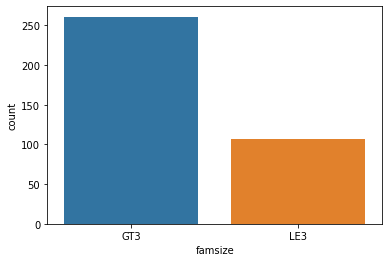

In [19]:
sns.countplot(x = 'famsize', data = stud)

In [20]:
#этот признак предлагается отбросить как незначимый, т.к. и в маленькой семье могут быть и гиперопека
#и повышенная бытовая нагрузка, так и в большой семье может происходить как распыление внимание от шума
#и прочих сопутствующих факторов, но в то же время в некоторых больших семьях возникает явление самоорганизации
#и взаимопомощи.

# pstatus - статус совместного проживания родителей
('T' - живут вместе 'A' - раздельно)

In [21]:
pd.DataFrame(stud.pstatus.value_counts())

,pstatus
T,314
A,36


In [22]:
stud.pstatus.isnull().sum() # 45 пустая позиция

45

<AxesSubplot:xlabel='pstatus', ylabel='count'>

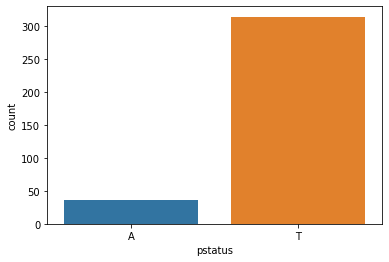

In [23]:
sns.countplot(x = 'pstatus', data = stud)

In [24]:
#предлагается отбросить: разного рода мотивация и внутрисемейный климат значительно важнее.

# medu - распределение по образованию матери
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [25]:
pd.DataFrame(stud.medu.value_counts()) 

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [26]:
stud.medu.isnull().sum() # 3 пустых позиции

3

# fedu - распределение по образованию отца
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [27]:
pd.DataFrame(stud.fedu.value_counts()) #распределение по образованию отца


,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [28]:
#единственный выброс 40.0 - скорее всего опечатка. поменяем на 4.0
stud.fedu = stud.fedu.apply(lambda x: 4.0 if x == 40.0 else x)
pd.DataFrame(stud.fedu.value_counts()) #проверяем

,fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


In [29]:
stud.fedu.isnull().sum() #24 позиции с неизвестным уровнем образования

24

In [30]:
stud.medu = stud.medu.fillna(stud.medu.median()) #заменим пропуски на медианное значение.
stud.fedu = stud.fedu.fillna(stud.fedu.median())

<AxesSubplot:xlabel='medu', ylabel='Count'>

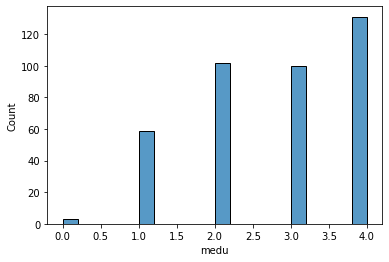

In [31]:
sns.histplot(data=stud.medu, bins = 5, binwidth = 0.2)

<AxesSubplot:xlabel='fedu', ylabel='Count'>

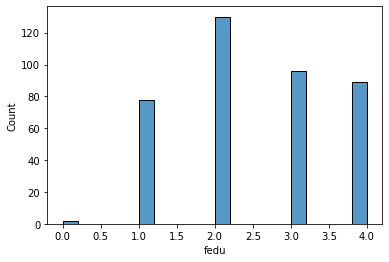

In [32]:
sns.histplot(data=stud.fedu, bins = 5, binwidth = 0.2)

# mjob, fjob - распределение по профессиям родителей

In [33]:
pd.DataFrame(stud.mjob.value_counts()) #распределение по профессии матери
#значимость профессий родителей неочевидна (очень много 'other'). требуется проверка.

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [34]:
stud.mjob.isnull().sum() #19 позиций с неуказанной профессией

19

In [35]:
pd.DataFrame(stud.fjob.value_counts()) #распределение по профессии отца

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [36]:
stud.fjob.isnull().sum() #36 позиций с неуказанной профессией

36

In [37]:
#переопределим неуказанные профессии как 'other'

stud.mjob = stud.mjob.apply(lambda x: 'other' if pd.isnull(x) else x)
stud.fjob = stud.fjob.apply(lambda x: 'other' if pd.isnull(x) else x)

<AxesSubplot:xlabel='mjob', ylabel='Count'>

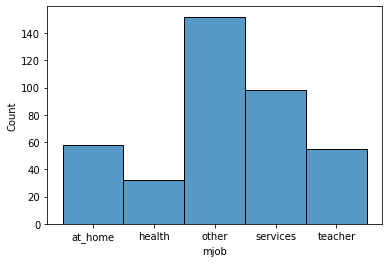

In [38]:
sns.histplot(data=stud.mjob, bins = 5)

<AxesSubplot:xlabel='fjob', ylabel='Count'>

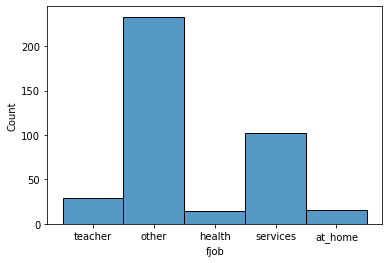

In [39]:
sns.histplot(data=stud.fjob, bins = 5)

# reason — причина выбора школы
'home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое

In [40]:
# очевидно, что "пассионарные" причины (репутация) должны оказывать большее влияние на итоги обучения,
# чем например "конформная" близость к дому. проверим ниже.

pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


In [41]:
stud.reason.isnull().sum() #17 неопределенных позиций.

17

In [42]:
stud.reason = stud.reason.apply(lambda x: 'home' if pd.isnull(x) else x) #обычно дети учатся там, где живут.
#это подтверждается в том числе и распределением по времени в пути до школы (ниже).
pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,121
reputation,103
other,34


<AxesSubplot:xlabel='reason', ylabel='count'>

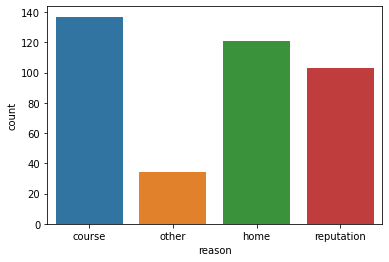

In [43]:
sns.countplot(x = 'reason', data = stud)

# guardian — опекун
'mother' - мать, 'father' - отец, 'other' - другое

In [44]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [45]:
stud.guardian.isnull().sum() #31 пустых

31

In [46]:
stud.guardian = stud.guardian.apply(lambda x: 'other' if pd.isnull(x) else x) #попробуем заполнить.

<AxesSubplot:xlabel='guardian', ylabel='count'>

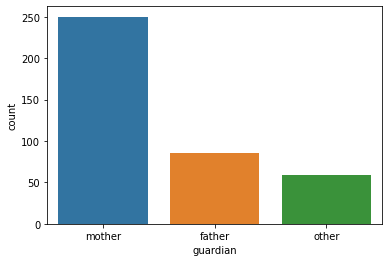

In [47]:
sns.countplot(x = 'guardian', data = stud)

# traveltime — время в пути до школы
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [48]:
pd.DataFrame(stud.traveltime.value_counts())

# долгие поездки в школу и обратно не только утомляют, но и отнимают время на занятия.
# предполагается отрицательная корреляция c итоговой оценкой. хотя тех, кто тратит на транспорт критично много времени, мало.

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [49]:
stud.traveltime.isnull().sum() #28 неопределенных позиций.


28

In [50]:
stud.traveltime = stud.traveltime.fillna(stud.traveltime.median()) #заполним неуказанные значения медианой
pd.DataFrame(stud.traveltime.value_counts())


,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


In [51]:
stud.traveltime.describe()

count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

<AxesSubplot:xlabel='traveltime', ylabel='count'>

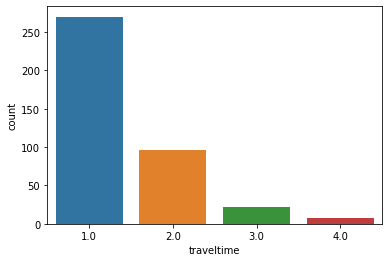

In [52]:
sns.countplot(x = 'traveltime', data = stud)

# studytime — время на учёбу помимо школы в неделю
1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов

In [53]:
# очевидно, что чем больше времени уделяется занятиям, тем лучше результат экзаменов.
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


In [54]:
stud.studytime.isnull().sum() #7 неопределенных позиций.

7

In [55]:
stud.studytime = stud.studytime.fillna(stud.studytime.median()) #заполним неуказанные значения медианой
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


<AxesSubplot:xlabel='studytime', ylabel='count'>

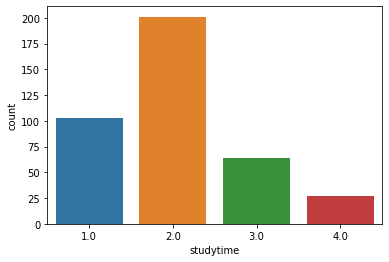

In [56]:
sns.countplot(x = 'studytime', data = stud)

# failures — количество внеучебных неудач
(n, если 1<=n<=3, иначе 0)

In [57]:
# не совсем понятно, что подразумевается под этим термином, но по контексту возможно влияние на мотивацию и результат.
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [58]:
stud.failures.isnull().sum() #22 неопределенных позиций. 

22

In [59]:
stud.failures = stud.failures.fillna(stud.failures.median()) #присвоим медианное значение
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,315
1.0,49
2.0,16
3.0,15


<AxesSubplot:xlabel='failures', ylabel='count'>

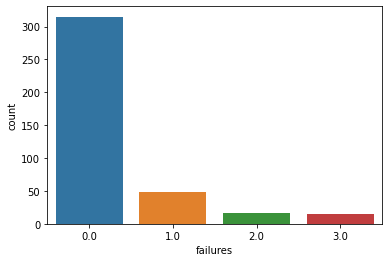

In [60]:
sns.countplot(x = 'failures', data = stud)

# schoolsup — дополнительная образовательная поддержка
(yes или no)

In [61]:
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,335
yes,51


In [62]:
stud.schoolsup.isnull().sum() #9 неопределенных позиций. 

9

In [63]:
stud.schoolsup = stud.schoolsup.apply(lambda x: 'yes' if pd.isnull(x) else x) #тянут "отстающих", а они этого стесняются
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,335
yes,60


<AxesSubplot:xlabel='schoolsup', ylabel='count'>

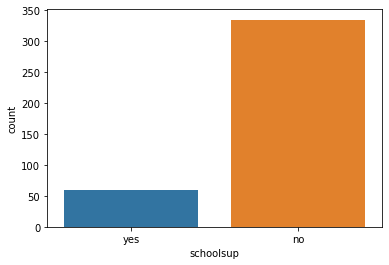

In [64]:
sns.countplot(x = 'schoolsup', data = stud)

In [65]:
#stud.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)
#pd.DataFrame(stud.schoolsup.value_counts())
#stud.schoolsup.describe()

#оцифровка бинарных переменных результата не дала

# famsup — семейная образовательная поддержка
(yes или no)

In [66]:
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,219
no,137


In [67]:
stud.famsup.isnull().sum() #39 неопределенных позиций. 

39

In [68]:
stud.famsup = stud.famsup.apply(lambda x: 'yes' if pd.isnull(x) else x) #то же, что и со школьной поддержкой
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,258
no,137


<AxesSubplot:xlabel='famsup', ylabel='count'>

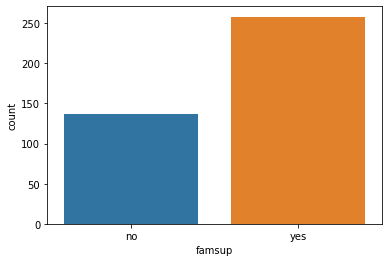

In [69]:
sns.countplot(x = 'famsup', data = stud)

# paid — дополнительные платные занятия по математике
(yes или no)

In [70]:
pd.DataFrame(stud.paid.value_counts())

,paid
no,200
yes,155


In [71]:
stud.paid.isnull().sum() #40 неопределенных позиций. 

40

In [72]:
stud.paid = stud.paid.apply(lambda x: 'no' if pd.isnull(x) else x) #не о чем написать = пропуск графы.
pd.DataFrame(stud.paid.value_counts())

,paid
no,240
yes,155


<AxesSubplot:xlabel='paid', ylabel='count'>

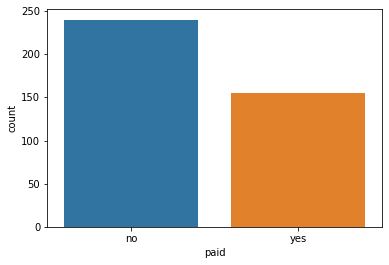

In [73]:
sns.countplot(x = 'paid', data = stud)

# activities — дополнительные внеучебные занятия
(yes или no)

In [74]:
# признак предположительно малозначим. т.к. может говорить, как о эрудиции, так и о распылении усилий. 
pd.DataFrame(stud.activities.value_counts())

,activities
yes,195
no,186


In [75]:
stud.activities.isnull().sum() #14 неопределенных позиций. 

14

In [76]:
stud.activities = stud.activities.apply(lambda x: 'no' if pd.isnull(x) else x) #не о чем написать = пропуск графы
pd.DataFrame(stud.activities.value_counts())

,activities
no,200
yes,195


<AxesSubplot:xlabel='activities', ylabel='count'>

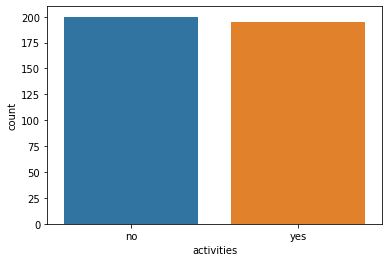

In [77]:
sns.countplot(x = 'activities', data = stud)

# nursery — посещался ли детский сад
(yes или no)

In [78]:
#предлагается отбросить за неочевидностью влияния на успехи в математике
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,300
no,79


In [79]:
stud.nursery.isnull().sum() #16 неопределенных позиций. 

16

<AxesSubplot:xlabel='nursery', ylabel='count'>

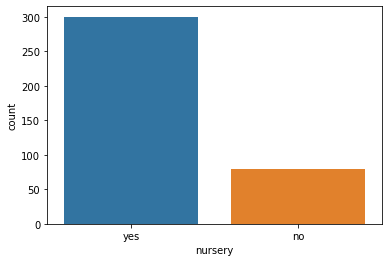

In [80]:
sns.countplot(x = 'nursery', data = stud)

# higher — планы на получение высшего образования
(yes или no)

In [81]:
# очевидно, будет наблюдаться сильная корелляция 
pd.DataFrame(stud.higher.value_counts())

,higher
yes,356
no,19


In [82]:
stud.higher.isnull().sum() #20 неопределенных позиций. 

20

In [83]:
stud.higher = stud.higher.apply(lambda x: 'yes' if pd.isnull(x) else x) #учение - свет.
pd.DataFrame(stud.higher.value_counts())

,higher
yes,376
no,19


<AxesSubplot:xlabel='higher', ylabel='count'>

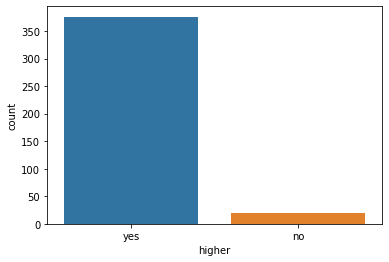

In [84]:
sns.countplot(x = 'higher', data = stud)

# internet — наличие интернета дома
(yes или no)

In [85]:
#возможна положительная корреляция
pd.DataFrame(stud.internet.value_counts())

,internet
yes,305
no,56


In [86]:
stud.internet.isnull().sum() #34 неопределенных позиций. 

34

In [87]:
stud.internet = stud.internet.apply(lambda x: 'yes' if pd.isnull(x) else x) #сейчас и-нет сейчас везде
pd.DataFrame(stud.internet.value_counts())

,internet
yes,339
no,56


<AxesSubplot:xlabel='internet', ylabel='count'>

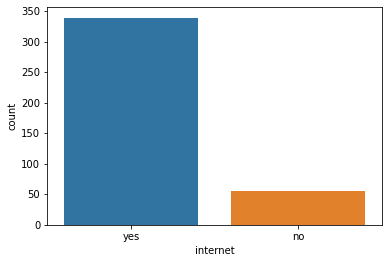

In [88]:
sns.countplot(x = 'internet', data = stud)

# romantic — наличие романтических отношений
(yes или no)

In [89]:
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,240
yes,124


In [90]:
stud.romantic.isnull().sum() #31 неопределенных позиций. 

31

In [91]:
stud.romantic = stud.romantic.apply(lambda x: 'yes' if pd.isnull(x) else x)
#если что-то есть, то к этому возрасту уже обычно не стесняются, особенно, если анкета анонимная
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,240
yes,155


<AxesSubplot:xlabel='romantic', ylabel='count'>

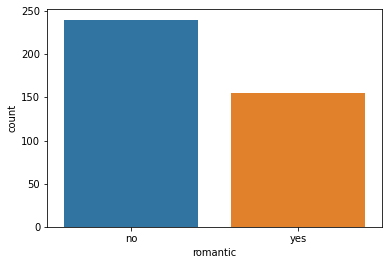

In [92]:
sns.countplot(x = 'romantic', data = stud)

# famrel — семейные отношения
(от 1 - очень плохо до 5 - очень хорошо)

In [93]:
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [94]:
stud.famrel.isnull().sum() #27 неопределенных позиций. 

27

In [95]:
#одно аномальное значение "-1.0" - скорее всего опечатка: поменяем на 1
stud.famrel = stud.famrel.apply(lambda x: 1.0 if x == -1.0 else x)
stud.famrel = stud.famrel.fillna(stud.famrel.median()) #заполняем медианным значением
pd.DataFrame(stud.famrel.value_counts()) #проверяем

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


<AxesSubplot:xlabel='famrel', ylabel='count'>

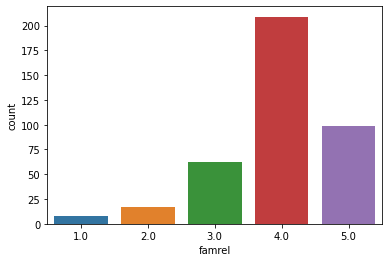

In [96]:
sns.countplot(x = 'famrel', data = stud)

# freetime — свободное время после школы
(от 1 - очень мало до 5 - очень много)

In [97]:
# связь может быть как положительной, так и отрицательной, в зависимости от того, чем это свободное время заполнять.
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [98]:
stud.freetime.isnull().sum() #11 неопределенных позиций. 

11

In [99]:
stud.freetime = stud.freetime.fillna(stud.freetime.median()) #заполняем медианным значением
pd.DataFrame(stud.freetime.value_counts()) #проверяем

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


<AxesSubplot:xlabel='freetime', ylabel='count'>

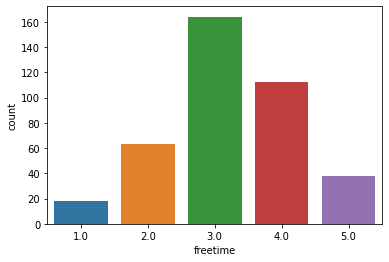

In [100]:
sns.countplot(x = 'freetime', data = stud)

# goout — проведение времени с друзьями
(от 1 - очень мало до 5 - очень много)

In [101]:
# скорее всего для результативной учебы этот признак вреден
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [102]:
stud.goout.isnull().sum() #8 неопределенных позиций. 

8

In [103]:
stud.goout = stud.goout.fillna(stud.goout.median()) #заполняем медианным значением
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


<AxesSubplot:xlabel='goout', ylabel='count'>

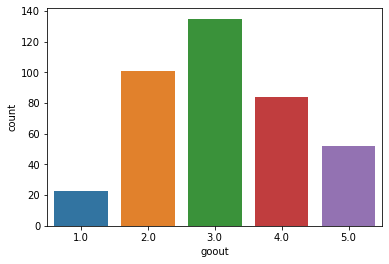

In [104]:
sns.countplot(x = 'goout', data = stud)

# health — текущее состояние здоровья
(от 1 - очень плохо до 5 - очень хорошо)

In [105]:
#скорее всего это малозначимый признак
pd.DataFrame(stud.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [106]:
stud.health.isnull().sum() #15 неопределенных позиций. 

15

In [107]:
stud.health = stud.health.fillna(stud.health.median()) #заполняем медианным значением
pd.DataFrame(stud.health.value_counts()) #проверяем

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


<AxesSubplot:xlabel='health', ylabel='count'>

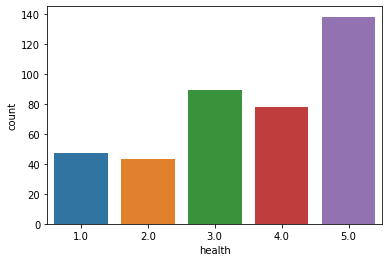

In [108]:
sns.countplot(x = 'health', data = stud)

# absences — количество пропущенных занятий

In [109]:
pd.DataFrame(stud.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


In [110]:
stud.absences.isnull().sum() #12 неопределенных позиций.

12

In [111]:
stud.absences = stud.absences.fillna(0) #заполняем нулевым значением

In [113]:
stud = stud.loc[stud.absences < 50] #отсеем аномально большие значения
pd.DataFrame(stud.absences.value_counts()) #проверяем

,absences
0.0,123
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<AxesSubplot:xlabel='absences', ylabel='Count'>

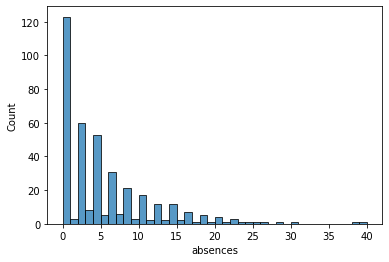

In [114]:
sns.histplot(data=stud.absences, bins = 40, binwidth = 1)

# granular
позиция без описания

In [115]:
#позиция без описания
pd.DataFrame(stud.granular.value_counts())
#предлагается отбросить.

,granular
-6.0,189
-3.0,103
-9.0,64
-12.0,27


# score — баллы по госэкзамену по математике

In [116]:
pd.DataFrame(stud.score.value_counts())

,score
50.0,54
55.0,45
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,25
80.0,16


In [117]:
stud.score.isnull().sum() #6 неопределенных позиций

6

<AxesSubplot:xlabel='score', ylabel='Count'>

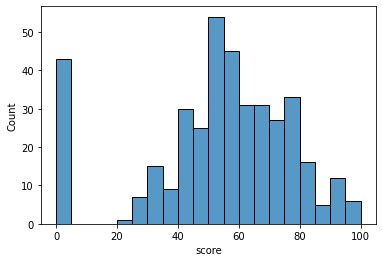

In [129]:
stud.score = stud.score.apply(lambda x: 0.0 if pd.isnull(x) else x) #присвоим '0.0': неявка = несдача автоматом
#pd.DataFrame(stud.score.value_counts())
sns.histplot(data=stud.score, bins = 18, binwidth = 5)

In [119]:
#stud = stud.loc[stud['score'] != 0]
#stud.score.hist(bins = 20)
# отбрасывание нулевого результата как неявки, выбросило из статистически значимых признак наличия
# романтических отношений (для возрастов <18)!

In [120]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160151,-0.151390,0.086332,-0.015196,0.217057,0.015394,0.054549,0.020399,0.133803,-0.068004,0.180199,-0.183936
medu,-0.160151,1.000000,0.594546,-0.163478,0.077078,-0.243315,-0.077666,-0.016593,0.030912,0.063375,-0.051728,0.111889,0.236473
fedu,-0.151390,0.594546,1.000000,-0.118597,0.007828,-0.259287,-0.007853,-0.021672,-0.029921,0.040867,0.009298,0.028205,0.138506
traveltime,0.086332,-0.163478,-0.118597,1.000000,-0.095085,0.052728,0.096188,-0.019045,-0.005851,0.054718,-0.049022,0.007200,-0.065256
studytime,-0.015196,0.077078,0.007828,-0.095085,1.000000,-0.167846,-1.000000,0.038058,-0.120469,-0.051991,-0.074216,-0.077739,0.105028
failures,0.217057,-0.243315,-0.259287,0.052728,-0.167846,1.000000,0.169302,-0.025788,0.082441,0.106340,0.074908,0.103553,-0.348881
granular,0.015394,-0.077666,-0.007853,0.096188,-1.000000,0.169302,1.000000,-0.038587,0.122295,0.052513,0.074795,0.078221,-0.106430
famrel,0.054549,-0.016593,-0.021672,-0.019045,0.038058,-0.025788,-0.038587,1.000000,0.162981,0.062812,0.089615,-0.076920,0.046807
freetime,0.020399,0.030912,-0.029921,-0.005851,-0.120469,0.082441,0.122295,0.162981,1.000000,0.282292,0.065650,-0.019537,0.001911
goout,0.133803,0.063375,0.040867,0.054718,-0.051991,0.106340,0.052513,0.062812,0.282292,1.000000,-0.012177,0.090283,-0.140253


In [121]:
#неожиданно низкие коэффициенты корреляции. из общего ряда заметно выбивается уровень образования матери и внеучебные неудачи.
#если со вторым все понятно, то повышенная корреляция первого критерия вероятно связана с тем, что в качестве "опекуна"
# у подавляющего большинства учеников указана именно мать, а уровень образования матерей в этом опросе еще и несколько выше,
# чем у отцов. вероятнее всего под опекуном тут понимается не юридическое значение (т.к. большая часть семей - полная),
# а член семьи с которым у опрошенного ученика наиболее близкий контакт. 

In [122]:
#для проверки этого предположения введем еще две вспомогательные колонки 

stud = stud.assign(pedu = (stud.medu + stud.fedu)/2) #средний уровень образования родителей
stud = stud.assign(gedu = 0) # уровень образования "опекуна"
#заполним на основании значения в колонке guardian

stud['gedu'] = stud[['guardian', 'medu', 'fedu', 'pedu']].apply(
    lambda x: x[1] if x[0] == 'mother' else x[2] if x[0] == 'father' else x[3], axis=1)

pd.DataFrame(stud.pedu.value_counts())



,pedu
2.0,70
3.0,68
4.0,63
3.5,57
2.5,49
1.5,43
1.0,38
0.5,2


In [123]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score,pedu,gedu
age,1.000000,-0.160151,-0.151390,0.086332,-0.015196,0.217057,0.015394,0.054549,0.020399,0.133803,-0.068004,0.180199,-0.183936,-0.174522,-0.176515
medu,-0.160151,1.000000,0.594546,-0.163478,0.077078,-0.243315,-0.077666,-0.016593,0.030912,0.063375,-0.051728,0.111889,0.236473,0.896227,0.886713
fedu,-0.151390,0.594546,1.000000,-0.118597,0.007828,-0.259287,-0.007853,-0.021672,-0.029921,0.040867,0.009298,0.028205,0.138506,0.889527,0.724250
traveltime,0.086332,-0.163478,-0.118597,1.000000,-0.095085,0.052728,0.096188,-0.019045,-0.005851,0.054718,-0.049022,0.007200,-0.065256,-0.158320,-0.120119
studytime,-0.015196,0.077078,0.007828,-0.095085,1.000000,-0.167846,-1.000000,0.038058,-0.120469,-0.051991,-0.074216,-0.077739,0.105028,0.048116,0.041117
failures,0.217057,-0.243315,-0.259287,0.052728,-0.167846,1.000000,0.169302,-0.025788,0.082441,0.106340,0.074908,0.103553,-0.348881,-0.281304,-0.268128
granular,0.015394,-0.077666,-0.007853,0.096188,-1.000000,0.169302,1.000000,-0.038587,0.122295,0.052513,0.074795,0.078221,-0.106430,-0.048492,-0.041533
famrel,0.054549,-0.016593,-0.021672,-0.019045,0.038058,-0.025788,-0.038587,1.000000,0.162981,0.062812,0.089615,-0.076920,0.046807,-0.021385,-0.024440
freetime,0.020399,0.030912,-0.029921,-0.005851,-0.120469,0.082441,0.122295,0.162981,1.000000,0.282292,0.065650,-0.019537,0.001911,0.001057,0.003382
goout,0.133803,0.063375,0.040867,0.054718,-0.051991,0.106340,0.052513,0.062812,0.282292,1.000000,-0.012177,0.090283,-0.140253,0.058557,0.045212


In [124]:
#предположение не оправдалось: коэффициент корреляции уровня образования опекуна, ниже чем у образования матери.

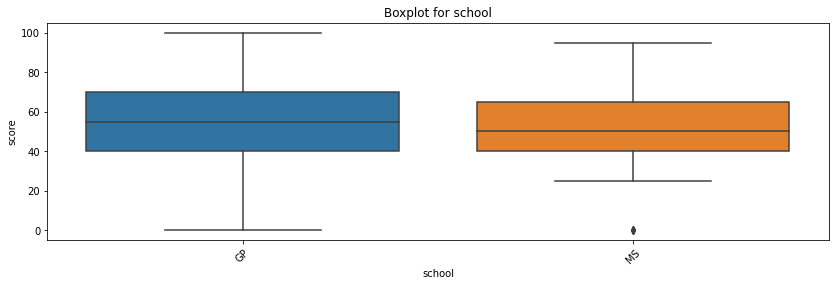

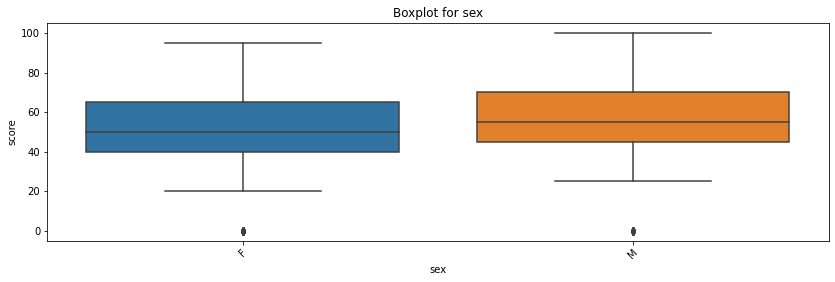

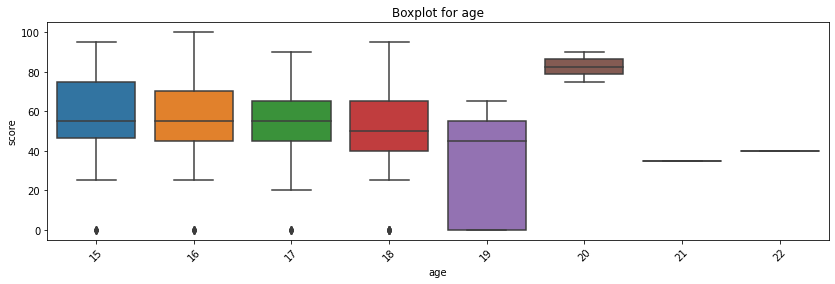

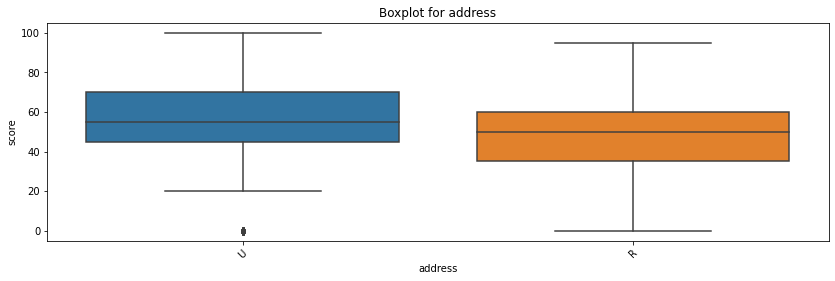

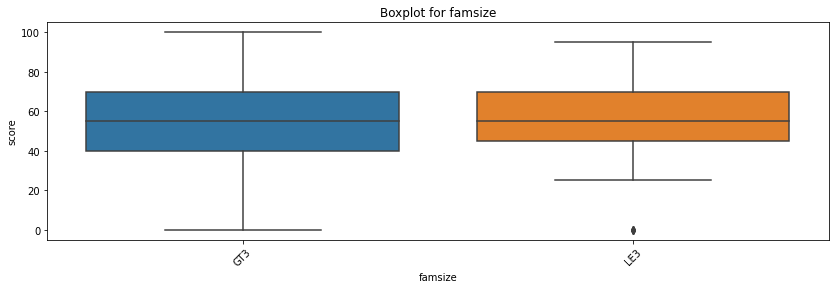

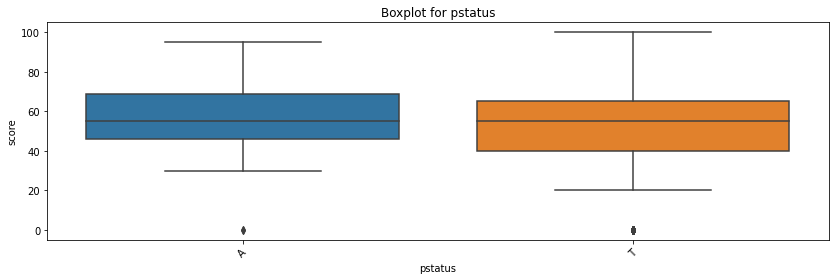

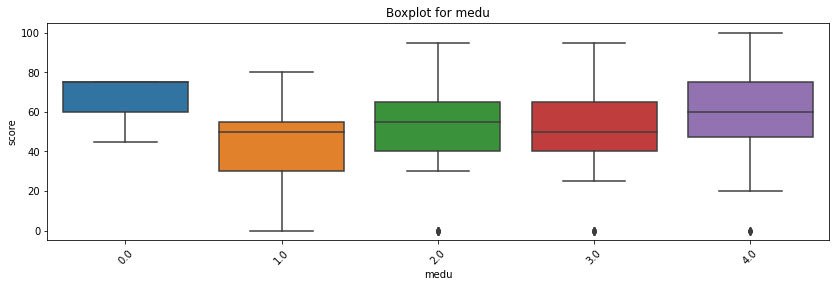

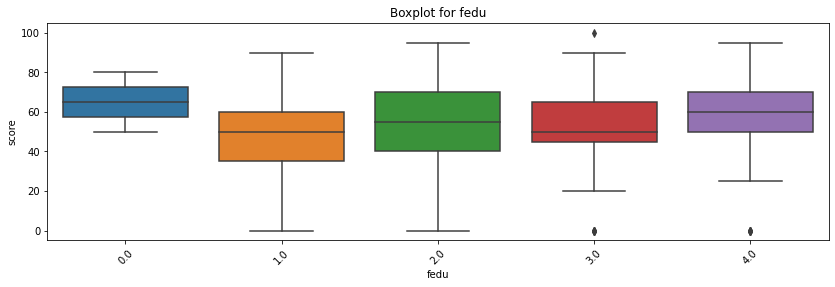

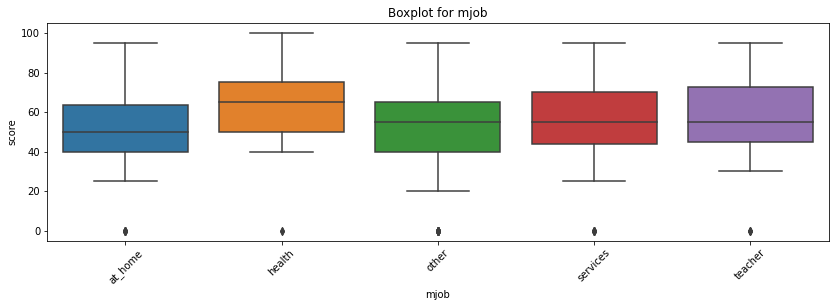

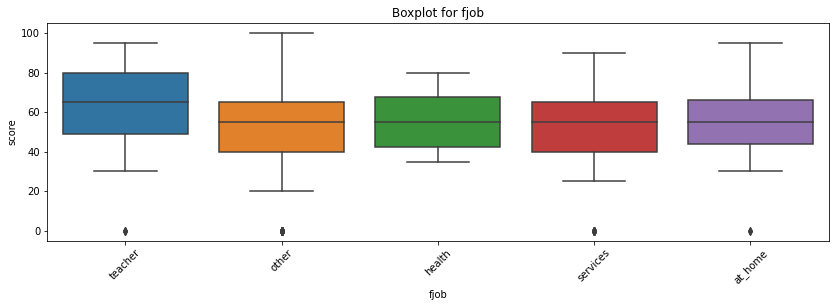

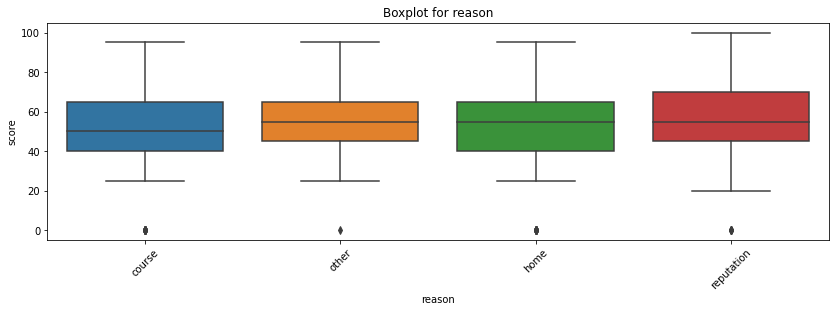

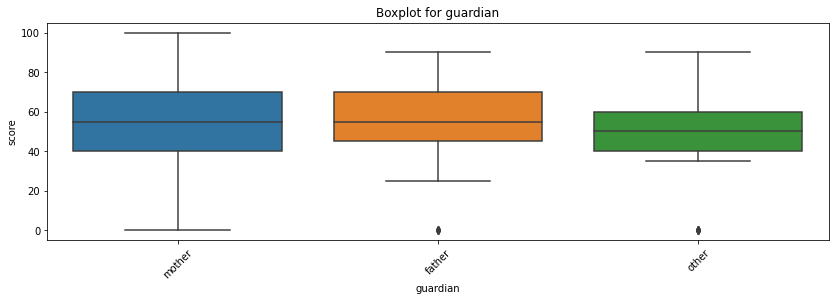

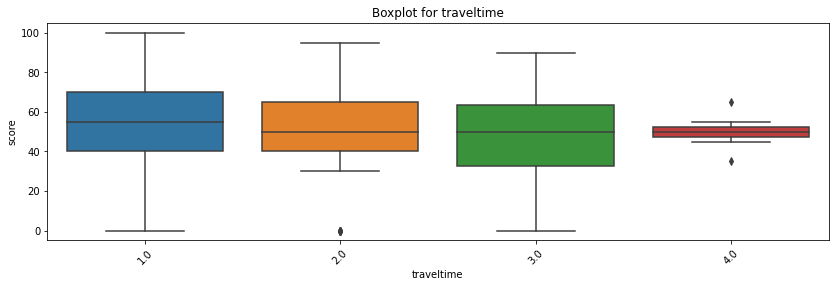

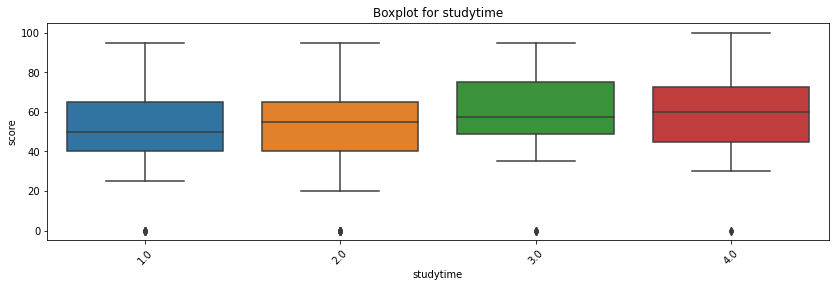

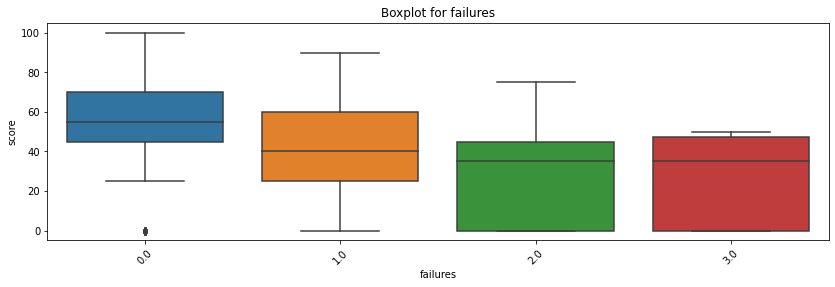

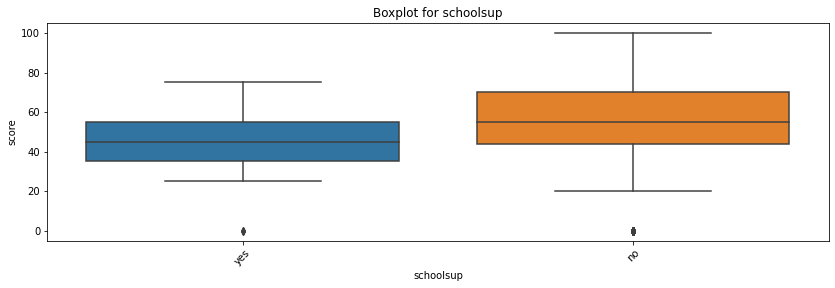

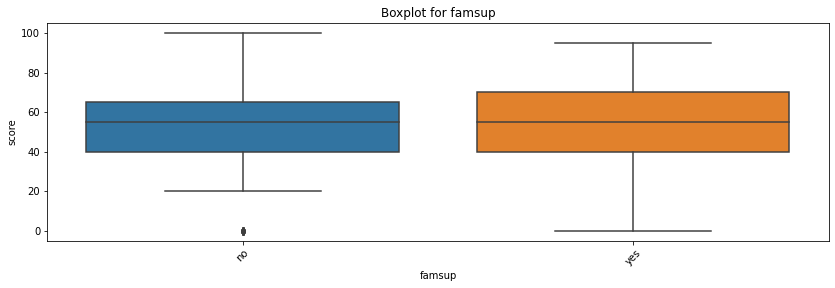

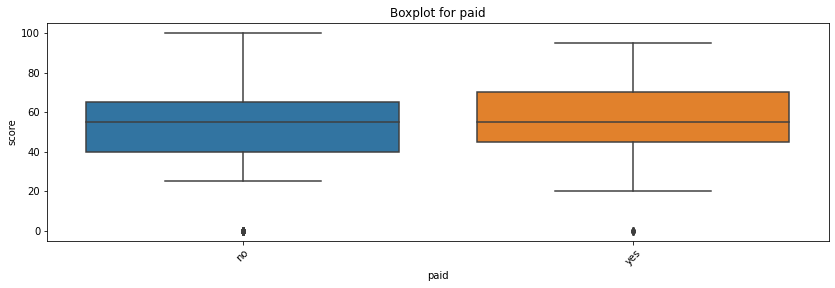

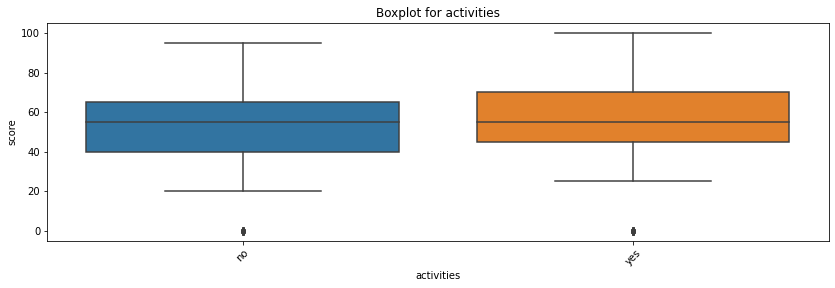

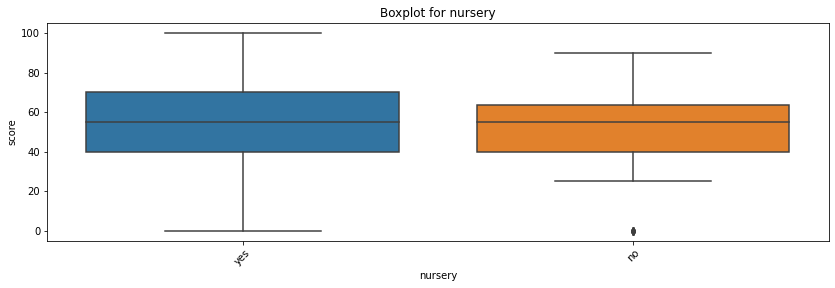

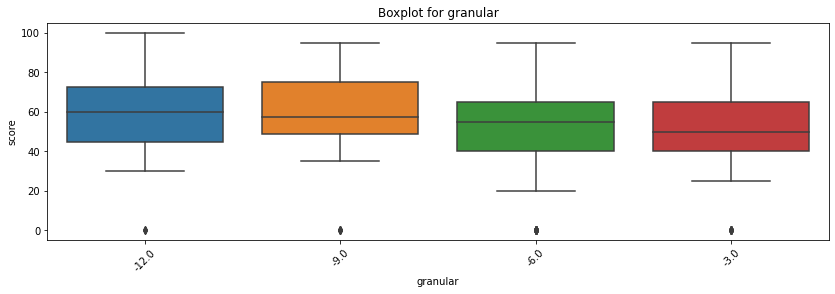

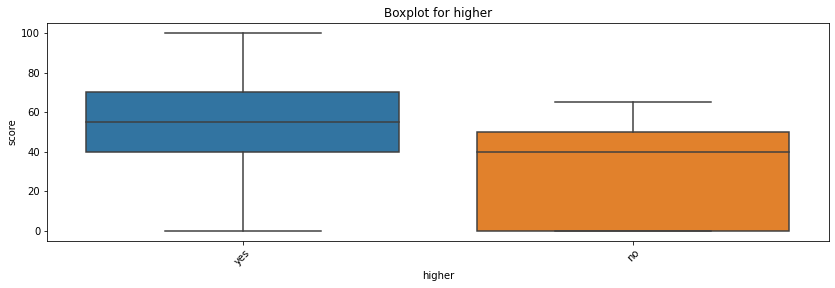

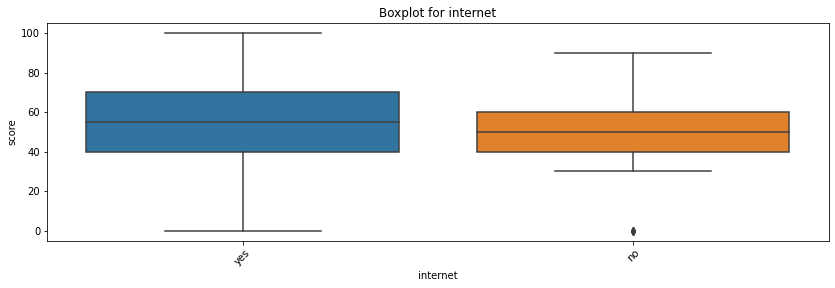

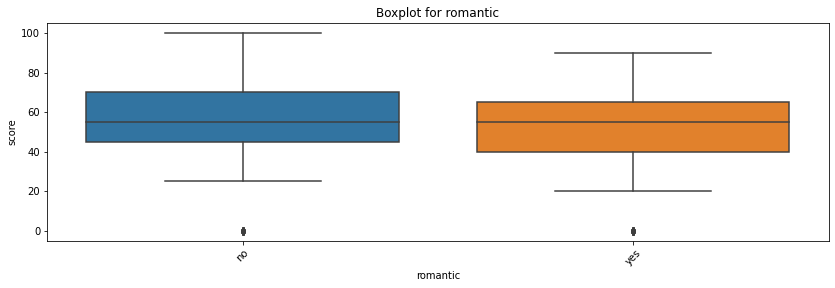

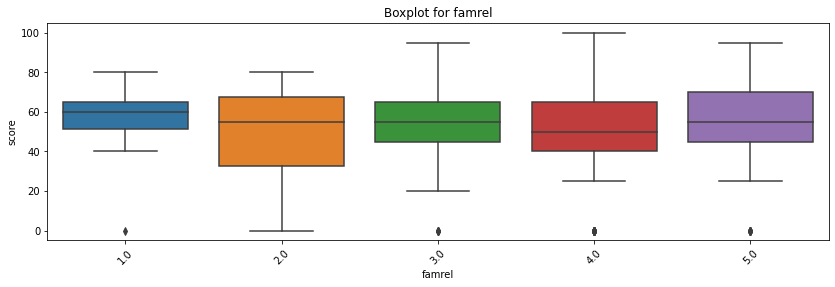

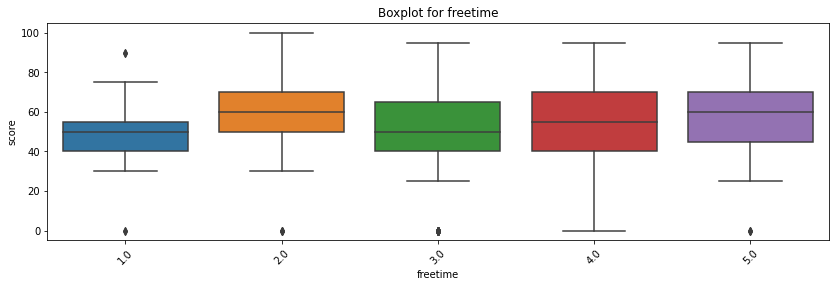

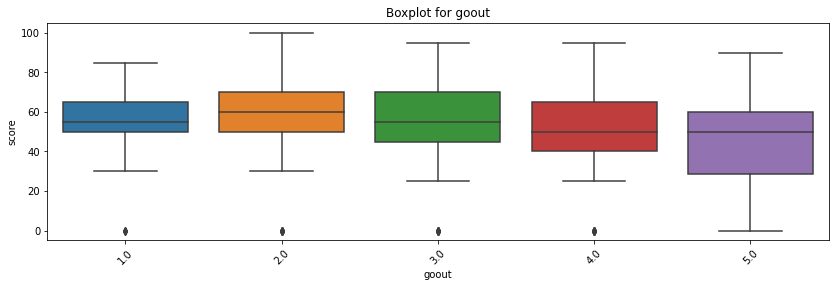

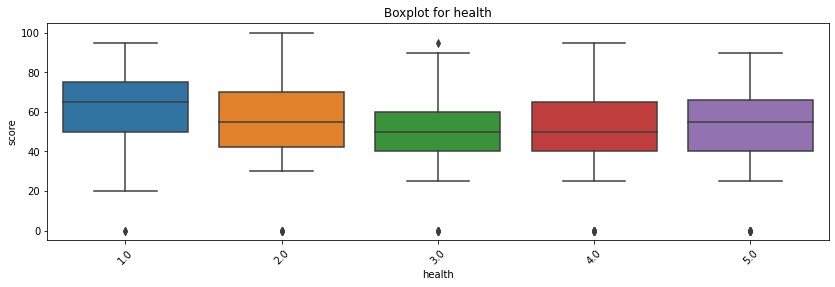

In [125]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:20])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

       
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
            'goout', 'health'  
           ]:
    get_boxplot(col)

In [126]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
            'goout', 'health', 'absences'
           ]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


In [127]:
stud.drop(['age'], inplace = True, axis = 1) #начинает работать только на целом возрастном диапазоне, но стоит удалить
#всего 5 "второгодников" (20+), как значимость пропадает.
stud.drop(['pstatus'], inplace = True, axis = 1) #как и предполагалось
stud.drop(['famsize'], inplace = True, axis = 1) #как и предполагалось
stud.drop(['guardian'], inplace = True, axis = 1) #непонятный признак с невыявленной значимостью.
stud.drop(['nursery'], inplace = True, axis = 1) #как и предполагалось
stud.drop(['granular'], inplace = True, axis = 1) #непонятный признак с абсолютной корреляцией studytime 
stud.drop(['pedu'], inplace = True, axis = 1) # вспомогательный признак, который не помог
stud.drop(['gedu'], inplace = True, axis = 1) # вспомогательный признак, который не помог
stud.drop(['famrel'], inplace = True, axis = 1) # влияния не оказывает
stud.drop(['mjob'], inplace = True, axis = 1) # решено отбросить для учета вероятности аномальности данной выборки:
#самые высокие оценки по математике, если мама - врач?
stud.drop(['fjob'], inplace = True, axis = 1) # заметного влияния не оказывает, но возможна аномальность
stud.drop(['reason'], inplace = True, axis = 1) # различия между разными причинами есть, но небольшие.
stud.drop(['traveltime'], inplace = True, axis = 1) #большинство живет рядом со школой, поэтому влияния не оказывает. 
stud.drop(['freetime'], inplace = True, axis = 1) # неоднозначный признак с небольшими различиями в зависимости от значения
stud.drop(['famsup'], inplace = True, axis = 1) # в нашем случае в отличие от школьных допзанятий малозначим
stud.drop(['paid'], inplace = True, axis = 1) # странно, но влияния не обнаружено 
stud.drop(['activities'], inplace = True, axis = 1)  # неоднозначный признак с небольшими различиями от значения к значению
stud.drop(['health'], inplace = True, axis = 1)  # значимость не выявлена
stud.drop(['internet'], inplace = True, axis = 1) # различия между вариантами есть, но совсем небольшие.
stud.drop(['school'], inplace = True, axis = 1) #видимо эти две школы в данной выборке очень похожи 

display(stud.head(10))

,sex,address,medu,fedu,studytime,failures,schoolsup,higher,romantic,goout,absences,score
0,F,U,4.0,4.0,2.0,0.0,yes,yes,no,4.0,6.0,30.0
1,F,U,1.0,1.0,2.0,0.0,no,yes,no,3.0,4.0,30.0
2,F,U,1.0,1.0,2.0,3.0,yes,yes,yes,2.0,10.0,50.0
3,F,U,4.0,2.0,3.0,0.0,no,yes,yes,2.0,2.0,75.0
4,F,U,3.0,3.0,2.0,0.0,no,yes,no,2.0,4.0,50.0
5,M,U,4.0,3.0,2.0,0.0,no,yes,no,2.0,10.0,75.0
6,M,NaN,2.0,2.0,2.0,0.0,no,yes,no,4.0,0.0,55.0
7,F,U,4.0,4.0,2.0,0.0,yes,yes,no,4.0,6.0,30.0
8,M,U,3.0,2.0,2.0,0.0,no,yes,no,2.0,0.0,95.0
9,M,U,3.0,4.0,2.0,0.0,no,yes,no,1.0,0.0,75.0


# выводы
основными факторами, влияющими на успешность сдачи экзамена по математике являются: 
- пол (мальчики успешней)
- место проживания (удивительно, но согласно этой выборке городские дети успешней в математике)
- уровни образования родителей (совершенно закономерно)
- количество времени уделяемого на самостоятельные занятия.
- количество пропусков занятий.
- время, проводимое с друзьями.
- внеучебные неудачи (больше неудач - хуже мотивация - ниже результат экзамена).
- дополнительные занятия в школе (видимо тут имеются в виду не факультатив для продвинутого изучения,
    а именно занятия для сильно отстающих, и уровень их результативности всё равно ниже, чем у тех, кому
    такие занятия не требуются)
- планы на поступление в вуз (те, кто хочет получить высшее образование, сильнее замотивированы)
- романтические отношения (сильно отвлекают о учебы с закономерным результатом, правда, работает лишь для тех, кто младше
    18лет)
    
в общем, собирательный двоечник (точнее двоечница) - влюбленная деревенская девочка, с малообразованными родителями, которая вместо занятий и уроков гуляет с друзьями и закономерно не собирается учиться дальше.